## Machine Learning Exercise 2 - Introduction to Logistic Regression for Predictive Analytics

For this exercise, you'll be using the same wego dataset from last exercise. Your goal will be to predict whether a trip is on-time.

1. Create a new (target) variable, ON-TIME. We'll consider a trip to be on-time is it is no more than 6 minutes late (ADHERENCE >= -6) and is  no more than 1 minute early (ADHERENCE <= 1).

**Note:** Make sure that you perform a train/test split before fitting any models so that you can properly measure the performance of the model.

2. Fit a logistic regression model predicting the ADHERENCE using the ROUTE_ABBR and ROUTE_DIRECTION_NAME columns. How accurate is this model? How does it do in terms of precition and recall? What about ROC-AUC and calibration?

3. Now, try using the ROUTE_ABBR, ROUTE_DIRECTION_NAME, and OPERATOR. Does this improve the model? Note: you may need to increase the max_iter parameter of your model in order for it to converge.

4. Finally, the data you have been provided has an STARTING_ADHERENCE column, which contains the ADHERENCE at the beginning of the route. If you add this metric, does it improve the model?

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data, called wego

In [3]:
wego = pd.read_csv('../data/wego_ml.csv')

1. Create a new (target) variable, ON-TIME. We'll consider a trip to be on-time is it is no more than 6 minutes late (ADHERENCE >= -6) and is no more than 1 minute early (ADHERENCE <= 1).`

In [4]:

wego['TARGET'] = [True if -6 <= x <= 1
                               else False  
                               for x in wego['ADHERENCE']]

In [5]:
wego[['ADHERENCE', 'TARGET']].head()

,ADHERENCE,TARGET
0,-0.933333,True
1,0.950000,True
2,-0.183333,True
3,1.500000,False
4,-3.083333,True


##### Note: Make sure that you perform a train/test split before fitting any models so that you can properly measure the performance of the model.

2. Fit a logistic regression model predicting the ADHERENCE using the ROUTE_ABBR and ROUTE_DIRECTION_NAME columns. How accurate is this model? How does it do in terms of precition and recall? What about ROC-AUC and calibration?

MH says: Take a look at the on-time percentage by route abbreviation and route direction, and that could explain why the model is not predicting any not on-times.

In [6]:
wego[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'TARGET']]

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TARGET
0,22,TO DOWNTOWN,True
1,22,FROM DOWNTOWN,True
2,22,TO DOWNTOWN,True
3,22,FROM DOWNTOWN,False
4,22,TO DOWNTOWN,True
...,...,...,...
64328,50,FROM DOWNTOWN,False
64329,55,TO DOWNTOWN,True
64330,50,TO DOWNTOWN,True
64331,50,TO DOWNTOWN,False


In [7]:
wego['TARGET'].value_counts(normalize=True)

True     0.727869
False    0.272131
Name: TARGET, dtype: float64

In [8]:
wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['TARGET'].value_counts(normalize=True)

ROUTE_ABBR  ROUTE_DIRECTION_NAME  TARGET
3           FROM DOWNTOWN         True      0.609367
                                  False     0.390633
            TO DOWNTOWN           True      0.784370
                                  False     0.215630
7           FROM DOWNTOWN         True      0.649664
                                  False     0.350336
            TO DOWNTOWN           True      0.809852
                                  False     0.190148
22          FROM DOWNTOWN         True      0.814074
                                  False     0.185926
            TO DOWNTOWN           True      0.881429
                                  False     0.118571
23          FROM DOWNTOWN         True      0.811060
                                  False     0.188940
            TO DOWNTOWN           True      0.819280
                                  False     0.180720
50          FROM DOWNTOWN         True      0.769058
                                  False     0.230942
     

In [9]:
categorical_predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']

X = wego[categorical_predictors]
X = pd.get_dummies(X, columns = categorical_predictors)
y = wego['TARGET']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [11]:
logreg = LogisticRegression().fit(X_train, y_train)

In [12]:
logreg.intercept_

array([1.08030544])

In [13]:
logreg.coef_

array([[-0.22242432, -0.08524548,  0.70093713,  0.45120402,  0.28365654,
        -0.20537229, -0.77711272, -0.14624289, -0.29854733,  0.29794731]])

In [14]:
boundary = - logreg.intercept_[0] / logreg.coef_[0]
boundary

array([ 4.85695729, 12.67287596, -1.54123016, -2.39427265, -3.80849826,
        5.26022974,  1.39015282,  7.3870629 ,  3.61853989, -3.62582714])

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Like before, we can use the `predict` method to see the predicted class.

In [16]:
logreg.predict(X_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
accuracy_score(y_test, logreg.predict(X_test))

0.7278662024372047

##### Definitions:
1. Precision=Out of those predicted to be in the positive class, what percentage actually are?
2. Recall= Out of those observation actually in the positive class, what percentage actually are predicted correctly?
3. f1=The (harmonic) mean of precision and recall.To have a good F1 score, a model must have a good precision and recall score.
4. Support=total observations per category
5. macro avg=unweighted average across all categories
6. weighted avg=weighted by number of observations per category

In [18]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      4377
        True       0.73      1.00      0.84     11707

    accuracy                           0.73     16084
   macro avg       0.36      0.50      0.42     16084
weighted avg       0.53      0.73      0.61     16084



C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(confusion_matrix(y_test, logreg.predict(X_test)))

[[    0  4377]
 [    0 11707]]


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

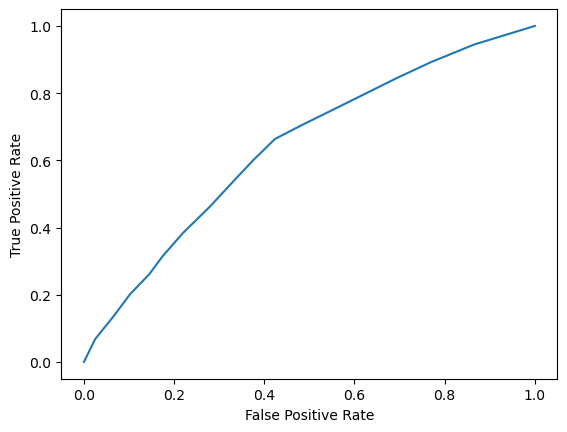

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [22]:
from sklearn.calibration import CalibrationDisplay

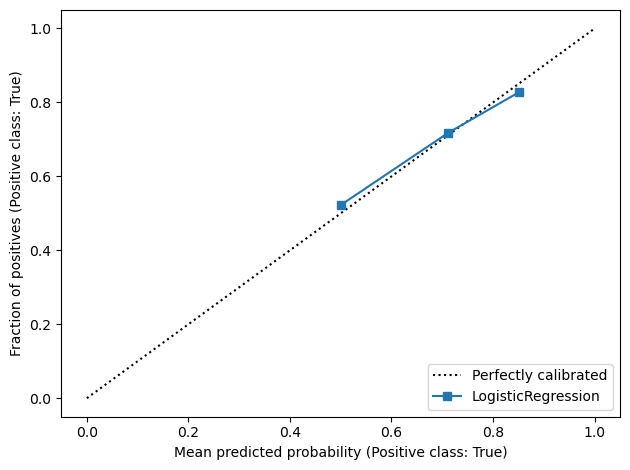

In [23]:
CalibrationDisplay.from_estimator(logreg, X_test, y_test)
plt.tight_layout()

3. Now, try using the ROUTE_ABBR, ROUTE_DIRECTION_NAME, and OPERATOR. Does this improve the model? Note: you may need to increase the max_iter parameter of your model in order for it to converge

In [27]:
more_predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR']
categorical_predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR']

X = wego[more_predictors]
X = pd.get_dummies(X, columns = categorical_predictors)
y = wego['TARGET']

In [42]:
logreg = LogisticRegression(max_iter=1000)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
X_test.columns

Index(['ROUTE_ABBR_3', 'ROUTE_ABBR_7', 'ROUTE_ABBR_22', 'ROUTE_ABBR_23',
       'ROUTE_ABBR_50', 'ROUTE_ABBR_52', 'ROUTE_ABBR_55', 'ROUTE_ABBR_56',
       'ROUTE_DIRECTION_NAME_FROM DOWNTOWN',
       'ROUTE_DIRECTION_NAME_TO DOWNTOWN',
       ...
       'OPERATOR_3134', 'OPERATOR_3138', 'OPERATOR_3140', 'OPERATOR_3142',
       'OPERATOR_3144', 'OPERATOR_3149', 'OPERATOR_3156', 'OPERATOR_3165',
       'OPERATOR_3166', 'OPERATOR_3173'],
      dtype='object', length=347)

In [45]:
accuracy_score(y_test, logreg.predict(X_test))

0.7433474260134295

##### Definitions:
1. Precision=Out of those predicted to be in the positive class, what percentage actually are?
2. Recall= Out of those observation actually in the positive class, what percentage actually are predicted correctly?
3. f1=The (harmonic) mean of precision and recall.To have a good F1 score, a model must have a good precision and recall score.
4. Support=total observations per category
5. macro avg=unweighted average across all categories
6. weighted avg=weighted by number of observations per category

In [46]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

       False       0.58      0.21      0.31      4377
        True       0.76      0.94      0.84     11707

    accuracy                           0.74     16084
   macro avg       0.67      0.58      0.57     16084
weighted avg       0.71      0.74      0.70     16084



In [47]:
print(confusion_matrix(y_test, logreg.predict(X_test)))

[[  906  3471]
 [  657 11050]]


In [48]:
wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR'])['TARGET'].value_counts(normalize=True)

ROUTE_ABBR  ROUTE_DIRECTION_NAME  OPERATOR  TARGET
3           FROM DOWNTOWN         326       True      0.632979
                                            False     0.367021
                                  357       False     0.500000
                                            True      0.500000
                                  359       False     0.500000
                                                        ...   
56          TO DOWNTOWN           3138      False     0.222222
                                  3142      True      0.650000
                                            False     0.350000
                                  3144      True      0.700000
                                            False     0.300000
Name: TARGET, Length: 3937, dtype: float64

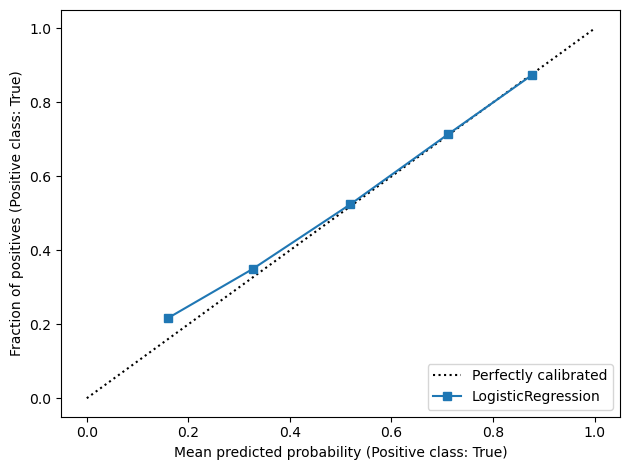

In [49]:
CalibrationDisplay.from_estimator(logreg, X_test, y_test)
plt.tight_layout()

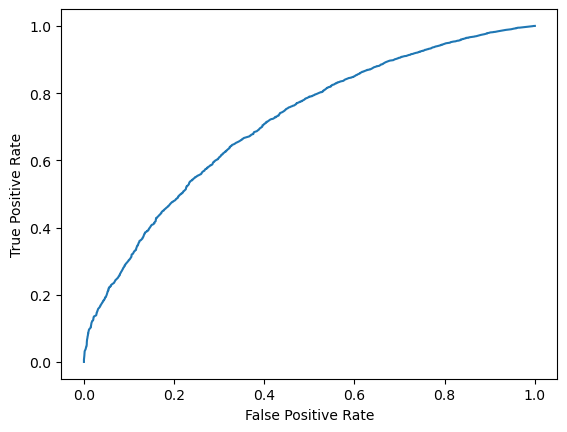

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

Finally, the data you have been provided has an STARTING_ADHERENCE column, which contains the ADHERENCE at the beginning of the route. If you add this metric, does it improve the model?

In [51]:
more_predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR', 'STARTING_ADHERENCE']
categorical_predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR']

X = wego[more_predictors]
X = pd.get_dummies(X, columns = categorical_predictors)
y = wego['TARGET']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
accuracy_score(y_test, logreg.predict(X_test))

0.7796568017905994

##### Definitions:
1. Precision=Out of those predicted to be in the positive class, what percentage actually are?
2. Recall= Out of those observation actually in the positive class, what percentage actually are predicted correctly?
3. f1=The (harmonic) mean of precision and recall.To have a good F1 score, a model must have a good precision and recall score.
4. Support=total observations per category
5. macro avg=unweighted average across all categories
6. weighted avg=weighted by number of observations per category

In [54]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

       False       0.72      0.31      0.43      4377
        True       0.79      0.96      0.86     11707

    accuracy                           0.78     16084
   macro avg       0.75      0.63      0.65     16084
weighted avg       0.77      0.78      0.75     16084



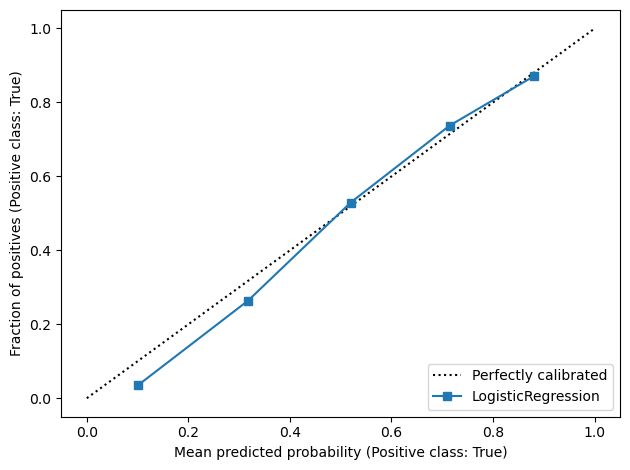

In [57]:
CalibrationDisplay.from_estimator(logreg, X_test, y_test)
plt.tight_layout()

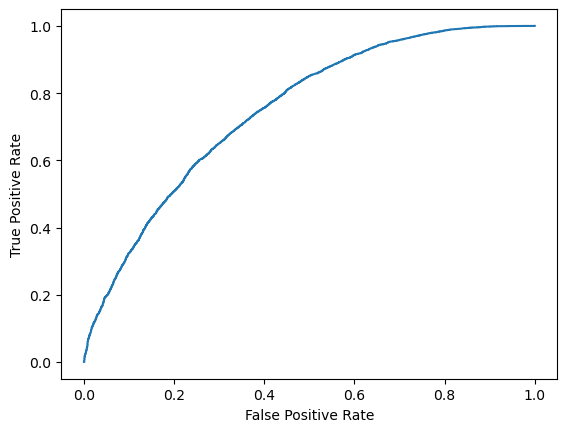

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');